# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL - OK
base_url = "https://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city - OK
    city_url = base_url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE coord.lat
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE main.temp_max
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE main.humidity
        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE clouds.all
        city_wind = city_weather['wind']['speed']# YOUR CODE HERE wind.speed default meter/sec
        city_country = city_weather['sys']['country']# YOUR CODE HERE sys.country
        city_date = city_weather['dt'] # YOUR CODE HERE dt

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | florencia
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | holualoa
Processing Record 7 of Set 1 | sarangani
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | lospalos
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | winejok
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | kendari
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | nabire
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | papao
Processing Record 22 of Set 1 | hawai

In [33]:
# Convert the cities weather data into a Pandas DataFrame - OK
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [34]:
# Convert the "City" column to title case
city_data_df['City'] = city_data_df['City'].str.title()
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d')

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,276.88,65,0,4.12,US,2024-05-08
1,Florencia,43.7667,11.2500,293.97,59,0,6.71,IT,2024-05-08
2,Tura,25.5198,90.2201,294.08,64,13,1.43,IN,2024-05-08
3,Wailua Homesteads,22.0669,-159.3780,297.39,82,100,4.63,US,2024-05-08
4,Waitangi,-43.9535,-176.5597,283.05,82,100,4.49,NZ,2024-05-08


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", encoding="utf-8", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kodiak,57.7900,-152.4072,276.88,65,0,4.12,US,2024-05-08
1,Florencia,43.7667,11.2500,293.97,59,0,6.71,IT,2024-05-08
2,Tura,25.5198,90.2201,294.08,64,13,1.43,IN,2024-05-08
3,Wailua Homesteads,22.0669,-159.3780,297.39,82,100,4.63,US,2024-05-08
4,Waitangi,-43.9535,-176.5597,283.05,82,100,4.49,NZ,2024-05-08


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

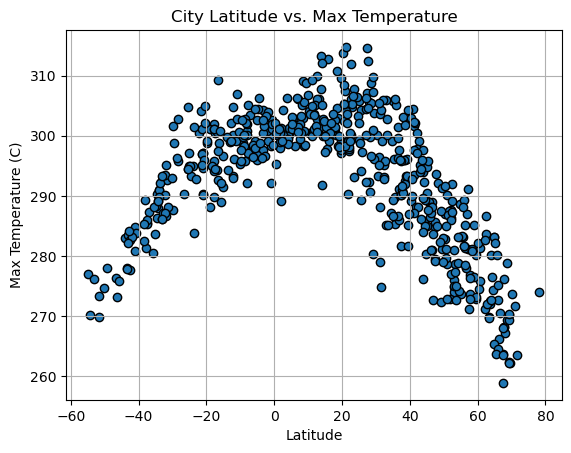

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

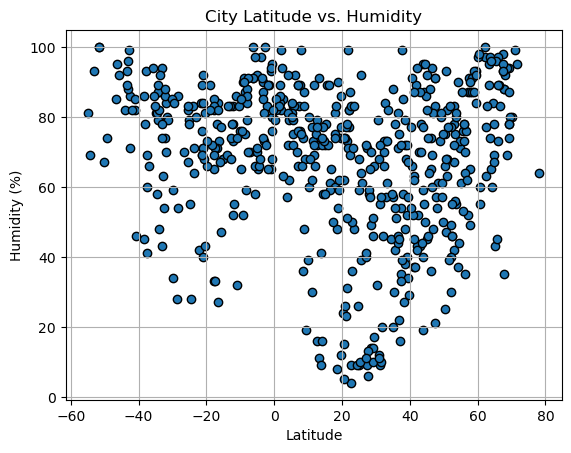

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

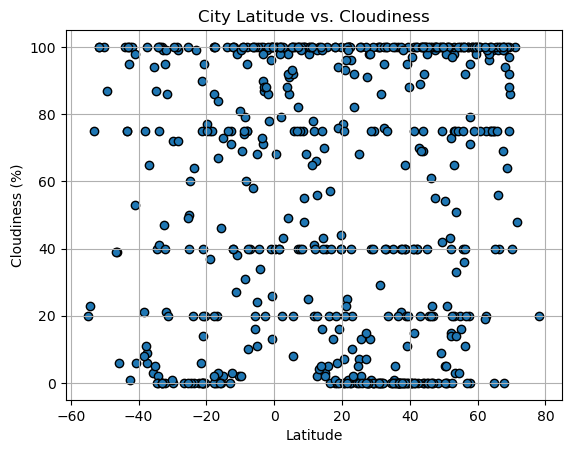

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

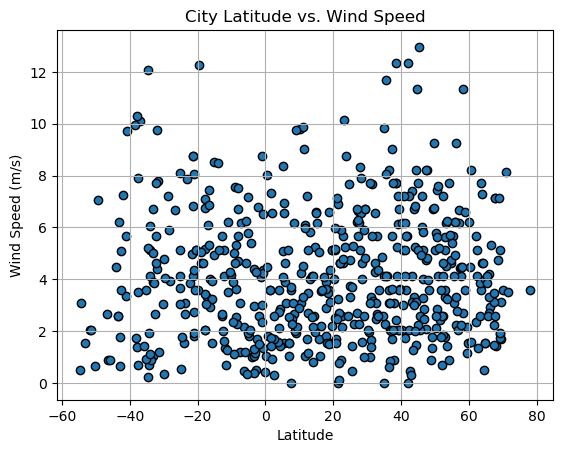

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
from scipy import stats
# Define a function to create Linear Regression plots
# Perform a linear regression on temperature vs. latitude
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      287.274229
1      302.200502
2      299.375955
3      297.719569
4      294.357262
          ...    
577    294.762763
578    299.910670
579    287.193763
580    292.979071
581    294.403429
Name: Lat, Length: 582, dtype: float64


In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kodiak,57.7900,-152.4072,276.88,65,0,4.12,US,2024-05-08
1,Florencia,43.7667,11.2500,293.97,59,0,6.71,IT,2024-05-08
2,Tura,25.5198,90.2201,294.08,64,13,1.43,IN,2024-05-08
3,Wailua Homesteads,22.0669,-159.3780,297.39,82,100,4.63,US,2024-05-08
5,Holualoa,19.6228,-155.9522,297.06,77,40,5.14,US,2024-05-08


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,Waitangi,-43.9535,-176.5597,283.05,82,100,4.49,NZ,2024-05-08
8,Lospalos,-8.5186,127.0025,295.81,87,79,2.56,TL,2024-05-08
10,Port-Aux-Francais,-49.3500,70.2167,278.00,74,87,7.06,TF,2024-05-08
11,Ushuaia,-54.8000,-68.3000,276.94,81,20,0.51,AR,2024-05-08
12,Kendari,-3.9450,122.4989,297.03,97,100,1.01,ID,2024-05-08


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6819666445823315


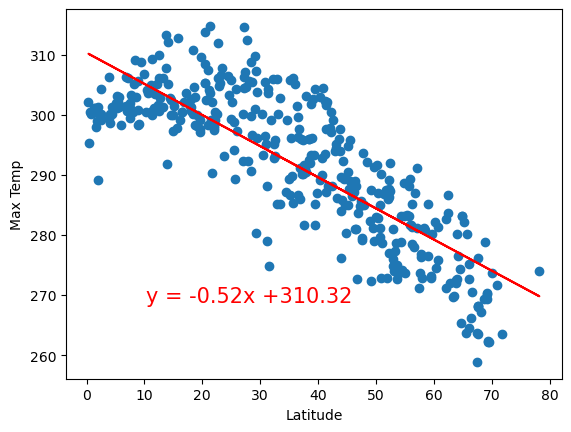

In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Annotate the line equation within the plot - anchor to slope
plt.annotate(line_eq, (min(x_values) + 10, min(y_values) + 10), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.619423507105442


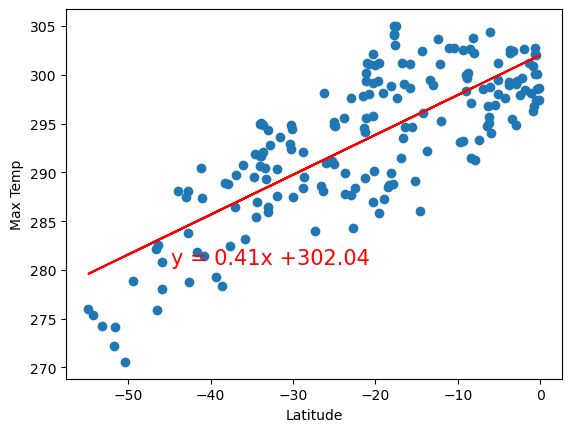

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Annotate the line equation within the plot - anchor to slope
plt.annotate(line_eq, (min(x_values) + 10, min(y_values) + 10), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere: Negative linear relationship between max temperature and latitude noted (as the latitude increases, 
max temperature decreases.) no outliers noted.

Southern Hemisphere: Positive linear relationship between max temperature and latitude noted (as the latitude increases, so does the temperature).
No outliers noted, but some clustering noted between lat -10 and 0/max temp 295-300 kelvin.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01726673421764425


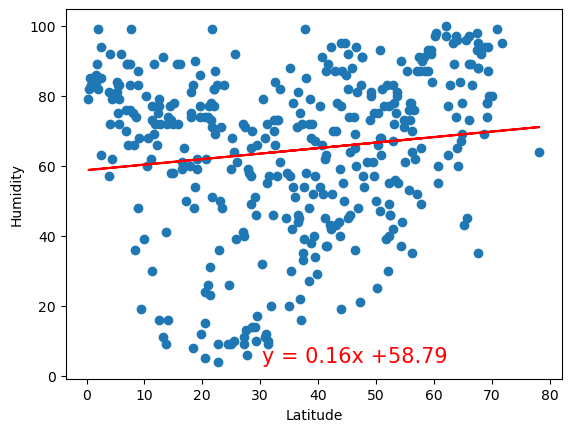

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Annotate the line equation within the plot - anchor to slope
plt.annotate(line_eq, (min(x_values) + 30, min(y_values)), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0008842376757563276


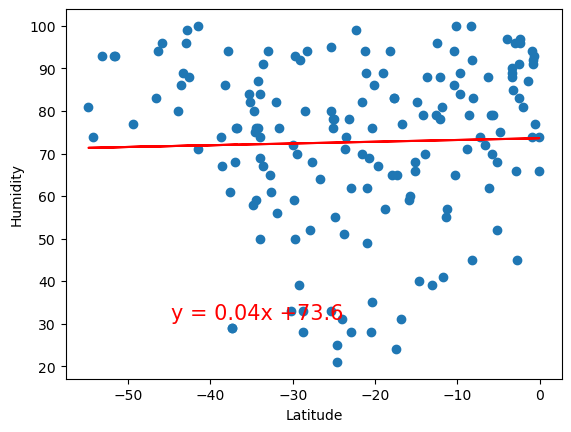

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Annotate the line equation within the plot - anchor to slope
plt.annotate(line_eq, (min(x_values) + 10, min(y_values) + 10), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
According to the line equations, there is evidence of only very slight, positive, linear relationships between 
humidity and latitude in both northern and southern hemispheres. Points on the graph are randomly scattered, however, 
making any correlation weak.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0037696082114109185


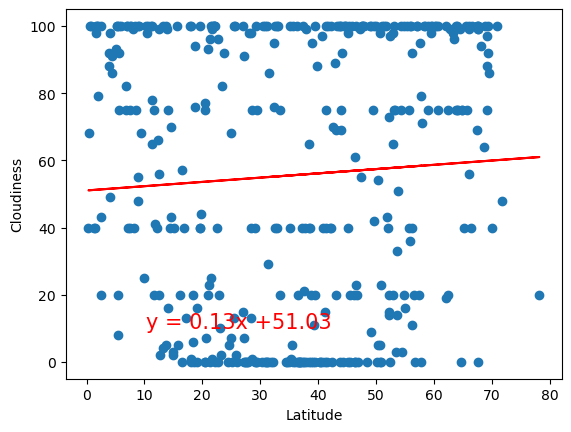

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Annotate the line equation within the plot - anchor to slope
plt.annotate(line_eq, (min(x_values) + 10, min(y_values) + 10), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.01018998066678152


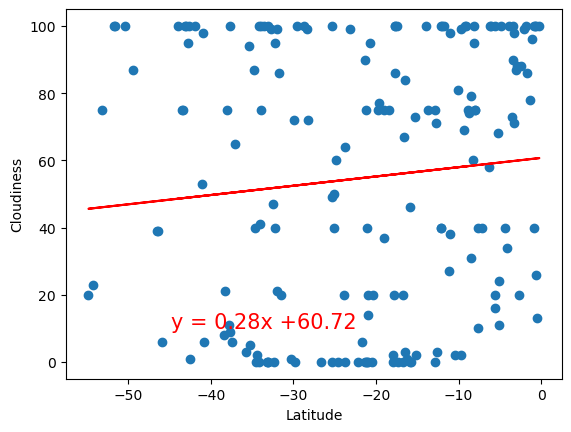

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Annotate the line equation within the plot - anchor to slope
plt.annotate(line_eq, (min(x_values) + 10, min(y_values) + 10), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:**
Northern Hemisphere: According to the line equations, there is evidence of slight, positive, linear relationships between 
cloudiness and latitude. The correlation is weak, and can likely be attributed to the clustering at 100% cloudy and 0%.

Southern Hemisphere: Stronger positive linear relationships between cloudiness and latitude.
The correlation is stronger, also likely attributed to the clustering at 100% cloudy and 0%. Most points on the graph are randomly scattered, however.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005140613768455818


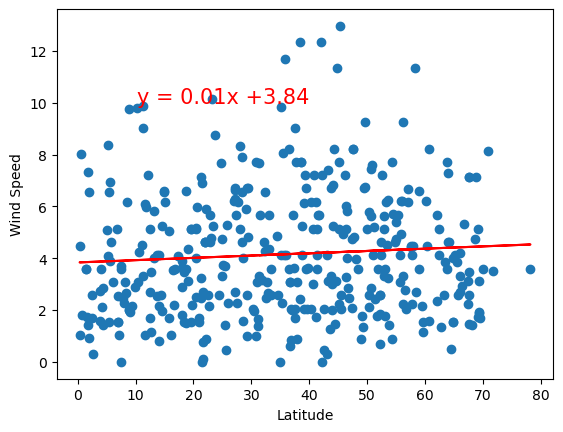

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Annotate the line equation within the plot - anchor to slope
plt.annotate(line_eq, (min(x_values) + 10, min(y_values) + 10), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0015736416205282538


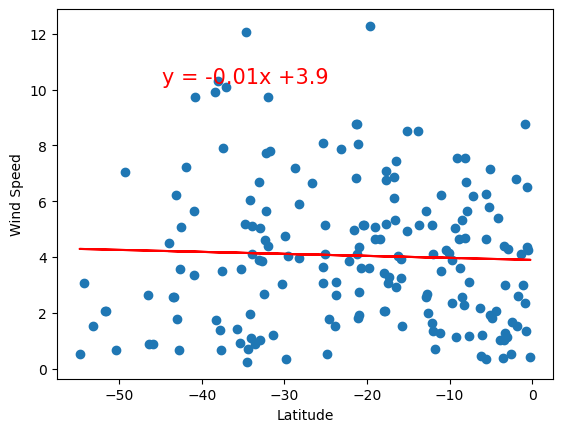

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Annotate the line equation within the plot - anchor to slope
plt.annotate(line_eq, (min(x_values) + 10, min(y_values) + 10), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:**
Northern Hemisphere: No apparent association. Points are randomly scattered on graph.

Southern Hemisphere: According to the line equations, there is evidence of a slight, negative linear relationships between 
wind speed and latitude in the southern hemispheres. Points on the graph are loosely scattered, however, 
making any correlation weak. There are a few outliers noted.